In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv(r"D:\Codebase\Python\Data Cleaning\Data Clening Concepts\loan_data.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,NaN,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,NaN,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y


In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender               20
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     1
LoanAmount            1
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)

C:\Users\vadik\AppData\Local\Temp\ipykernel_18504\2117298730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['CoapplicantIncome'].fillna(dataset['CoapplicantIncome'].mean(), inplace=True)


In [6]:
dataset.shape

(381, 13)

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,380.000000,370.000000,351.000000
mean,3579.845144,1280.636632,104.926316,340.864865,0.837607
std,1419.813818,2339.898481,28.371171,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,985.799988,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


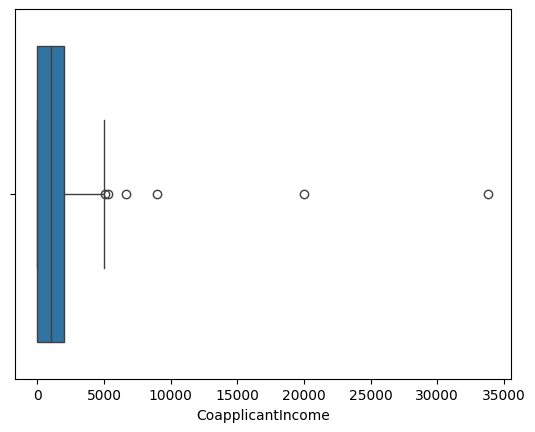

In [8]:
sns.boxplot(x='CoapplicantIncome', data=dataset)
plt.show()

C:\Users\vadik\AppData\Local\Temp\ipykernel_18504\4274022579.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

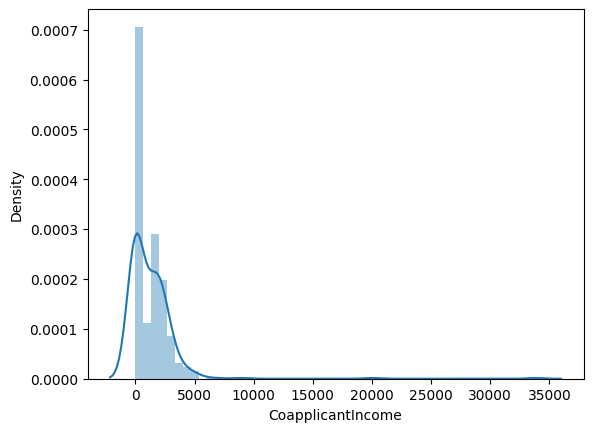

In [9]:
sns.distplot(dataset['CoapplicantIncome'])

In [10]:
min_range = dataset['CoapplicantIncome'].mean() - (3*dataset['CoapplicantIncome'].std())
max_range = dataset['CoapplicantIncome'].mean() + (3*dataset['CoapplicantIncome'].std())
min_range, max_range

(-5739.0588110441095, 8300.332074142214)

In [11]:
newdata = dataset[dataset['CoapplicantIncome']<=max_range]

In [12]:
newdata.shape

(378, 13)

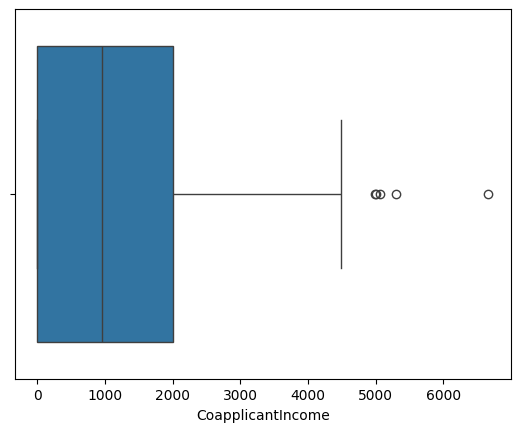

In [13]:
sns.boxplot(x='CoapplicantIncome', data=newdata)
plt.show()

In [14]:
# Now using Z-score to remove Outlier

In [15]:
z_score = (dataset['CoapplicantIncome'] - dataset['CoapplicantIncome'].mean()) / dataset['CoapplicantIncome'].std()
z_score

0      1507.452696
1      1280.089327
2      2357.452696
3        -0.547304
4      1515.452696
          ...     
376      -0.547304
377    1949.452696
378      -0.547304
379      -0.547304
380      -0.547304
Name: CoapplicantIncome, Length: 381, dtype: float64

In [16]:
dataset['z_score'] = z_score
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,NaN,360.0,1.0,Rural,N,1507.452696
1,LP001005,Male,Yes,0,Graduate,Yes,3000,1280.636632,66.0,360.0,1.0,Urban,Y,1280.089327
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y,2357.452696
3,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y,-0.547304
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y,1515.452696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.000000,128.0,360.0,1.0,Urban,Y,-0.547304
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.000000,108.0,360.0,1.0,Rural,Y,1949.452696
378,LP002978,Female,No,0,Graduate,No,2900,0.000000,71.0,360.0,1.0,Rural,Y,-0.547304
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.000000,40.0,180.0,1.0,Rural,Y,-0.547304


In [17]:
dataset[dataset['z_score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.547304
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y,-0.547304
10,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y,-0.547304
11,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N,-0.547304
12,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,-0.547304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N,-0.547304
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y,-0.547304
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.547304
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.547304
